<a href="https://colab.research.google.com/github/NgHoaDA/Du-an-ca-nhan/blob/main/Business%20Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymysql
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote
from sqlalchemy import text
import textwrap
db_connection_str = (
    "mysql+pymysql://mindx_sql:%s@45.117.83.230:1433/mindx_demo_database?charset=utf8mb4"
    % quote("Student1")
)
my_engine = create_engine(db_connection_str, echo = False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 587.3 kB/s eta 0:00:00


In [ ]:
orders = pd.read_excel('/content/Orders.xlsx')
order_items = pd.read_excel('/content/order_items.xlsx')

###Tổng doanh thu mà Olist thu được là bao nhiêu và thay đổi như thế nào theo thời gian?

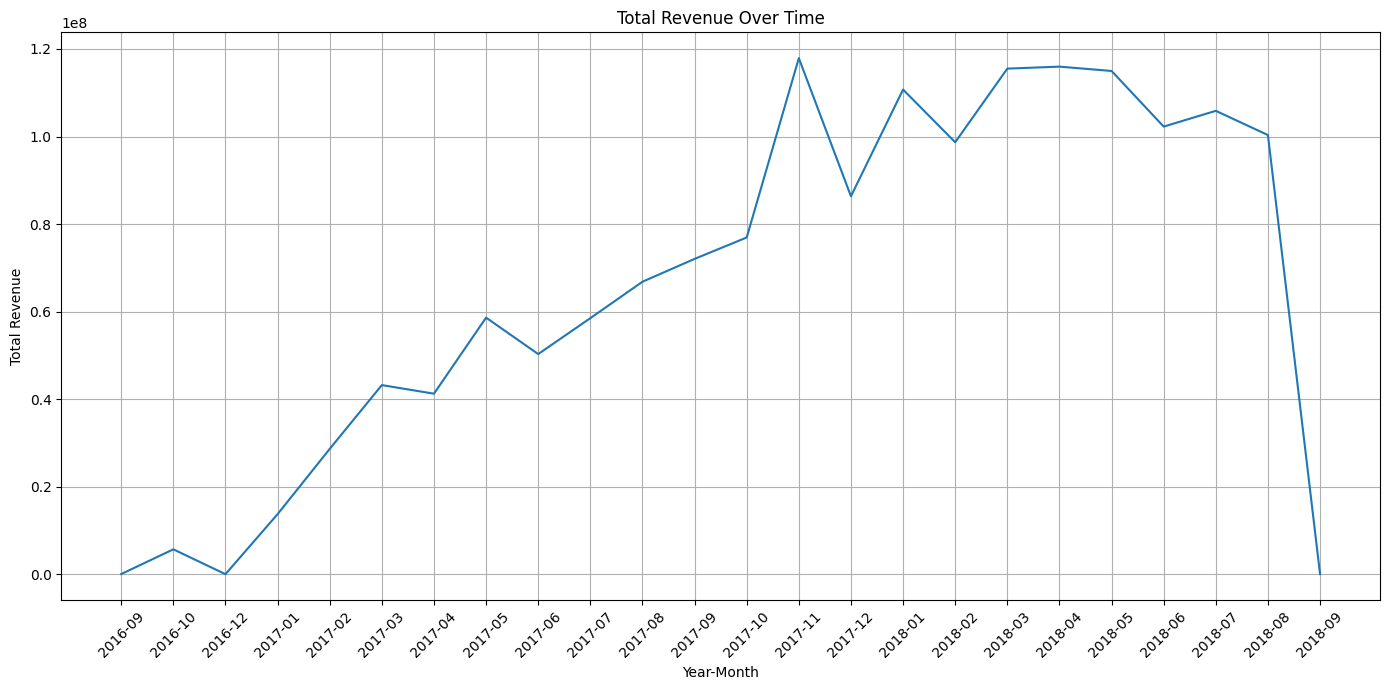

Total Revenue:  1584351530


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = pd.merge(orders, order_items, on='order_id')

merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

merged_data['total_revenue'] = merged_data['price'] + merged_data['freight_value']


merged_data['year_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')
revenue_over_time = merged_data.groupby('year_month')['total_revenue'].sum().reset_index()


revenue_over_time['year_month'] = revenue_over_time['year_month'].astype(str)

# Plot the total revenue over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=revenue_over_time, x='year_month', y='total_revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the total revenue
total_revenue = merged_data['total_revenue'].sum()
print('Total Revenue: ', total_revenue)

###Có bao nhiêu đơn đặt hàng được đặt trên Olist và số lượng các đơn hàng thay đổi như thế nào theo tháng hoặc mùa?

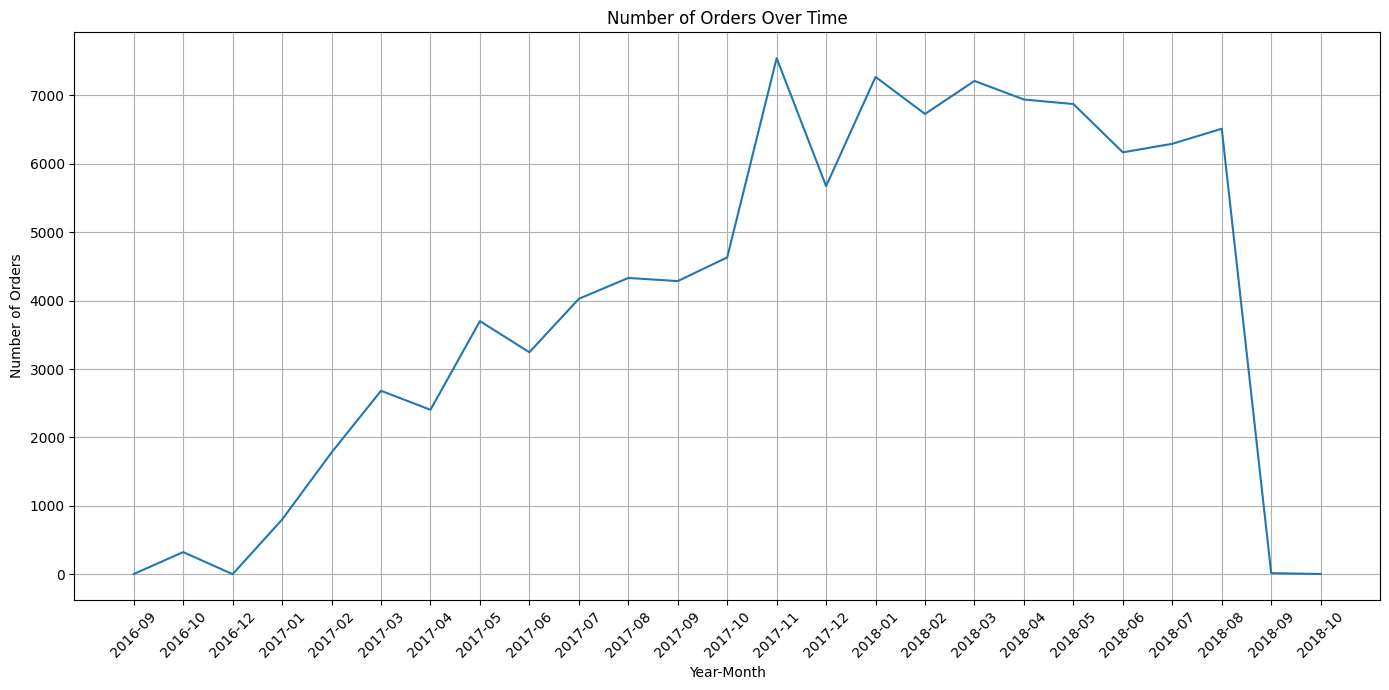

Total Number of Orders:  99441


In [ ]:

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')


orders_per_month = orders.groupby('year_month').size().reset_index(name='order_count')

orders_per_month['year_month'] = orders_per_month['year_month'].astype(str)

# Plot the number of orders over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=orders_per_month, x='year_month', y='order_count')
plt.title('Number of Orders Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the total number of orders
total_orders = orders.shape[0]
print('Total Number of Orders: ', total_orders)

###Các danh mục sản phẩm phổ biến nhất trên Olist là gì và doanh số bán hàng của chúng khác nhau như thế nào?

In [ ]:
products = pd.read_excel('/content/Products.xlsx')
product_category_translation = pd.read_excel('/content/product_category_name_translation.xlsx')

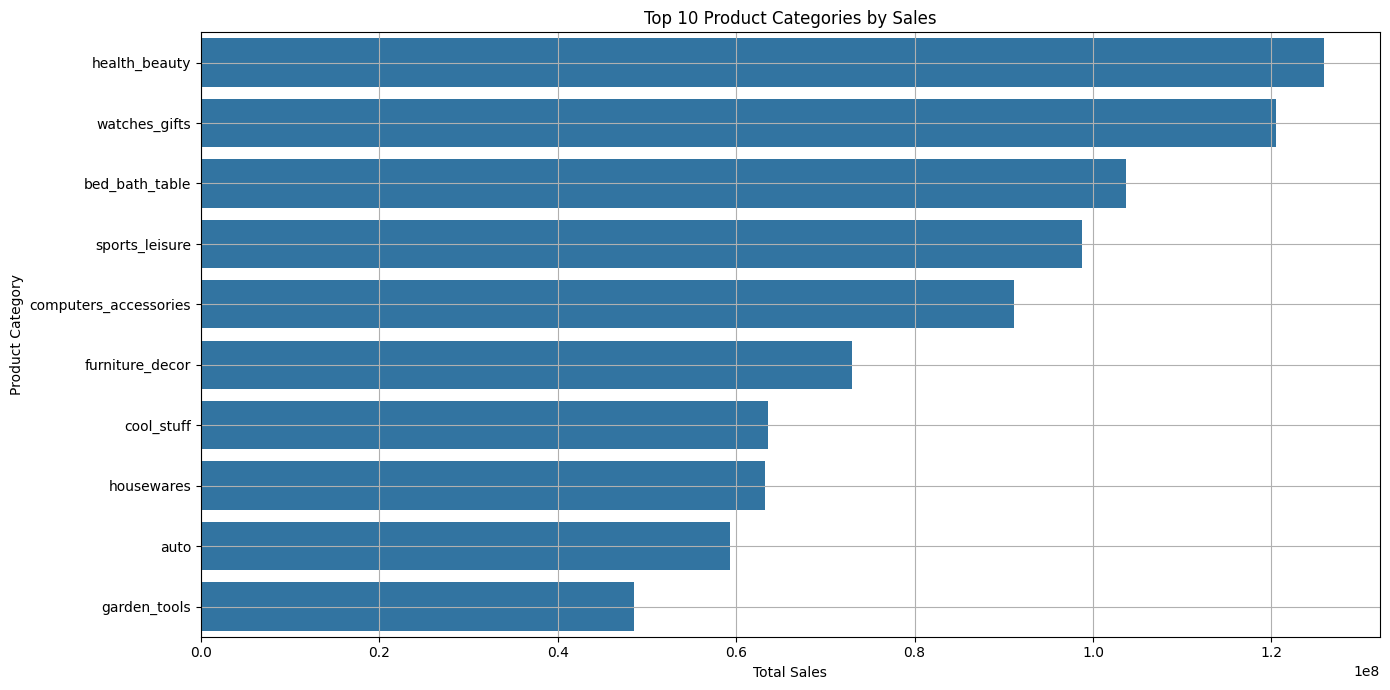

   product_category_name_english      price
43                 health_beauty  125868134
70                 watches_gifts  120500568
7                 bed_bath_table  103698868
65                sports_leisure   98804897
15         computers_accessories   91195432
39               furniture_decor   72976249
20                    cool_stuff   63529085
49                    housewares   63224866
5                           auto   59272011
42                  garden_tools   48525646


In [ ]:



order_items = order_items.merge(products, on='product_id')
order_items = order_items.merge(product_category_translation, on='product_category_name')


category_sales = order_items.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales = category_sales.sort_values(by='price', ascending=False)

# Plot the top 10 product categories by sales
plt.figure(figsize=(14, 7))
sns.barplot(data=category_sales.head(10), x='price', y='product_category_name_english')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the top 10 product categories by sales
print(category_sales.head(10))

###Giá trị Average Order Value (AOV) trên Olist là bao nhiêu và giá trị này thay đổi như thế nào theo Product Category hoặc Payment Method

In [ ]:
order_payments = pd.read_excel('/content/order_payments.xlsx')

In [ ]:
# Import the pandas library
import pandas as pd

# Load the necessary data
orders = pd.read_excel('/content/Orders.xlsx')
order_payments = pd.read_excel('order_payments.xlsx')

# Merge the dataframes to get payment methods in orders
orders = orders.merge(order_payments, on='order_id')

# Calculate the total payment value for each order
orders['total_payment'] = orders.groupby('order_id')['payment_value'].transform('sum')

# Calculate the Average Order Value (AOV)
aov = orders['total_payment'].mean()

# Calculate AOV by product category
order_items = pd.read_excel('order_items.xlsx')
products = pd.read_excel('Products.xlsx')
product_category_translation = pd.read_excel('product_category_name_translation.xlsx')
order_items = order_items.merge(products, on='product_id')
order_items = order_items.merge(product_category_translation, on='product_category_name')

# Merge order items with orders to get the total payment for each order
order_items = order_items.merge(orders[['order_id', 'total_payment']], on='order_id')

# Calculate AOV by product category
aov_by_category = order_items.groupby('product_category_name_english')['total_payment'].mean().reset_index()
aov_by_category = aov_by_category.sort_values(by='total_payment', ascending=False)

# Calculate AOV by payment method
aov_by_payment_method = orders.groupby('payment_type')['total_payment'].mean().reset_index()
aov_by_payment_method = aov_by_payment_method.sort_values(by='total_payment', ascending=False)

# Print the results
print('Average Order Value (AOV):', aov)
print('AOV by Product Category:')
print(aov_by_category.head(10))
print('AOV by Payment Method:')
print(aov_by_payment_method)